<a href="https://colab.research.google.com/github/valeria-angelino/ReDI-school---Python/blob/main/Predictions_in_LoL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# Import and data cleaning

from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('high_diamond_ranked_10min.csv')

df = df.dropna()

df = df.drop(columns=['gameId'])

X = df.drop('blueWins', axis=1)
y = df['blueWins']

print(df.head())
print(df.info())

Saving high_diamond_ranked_10min.csv to high_diamond_ranked_10min (20).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   

Accuracy: 0.7246963562753036
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       983
           1       0.73      0.72      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



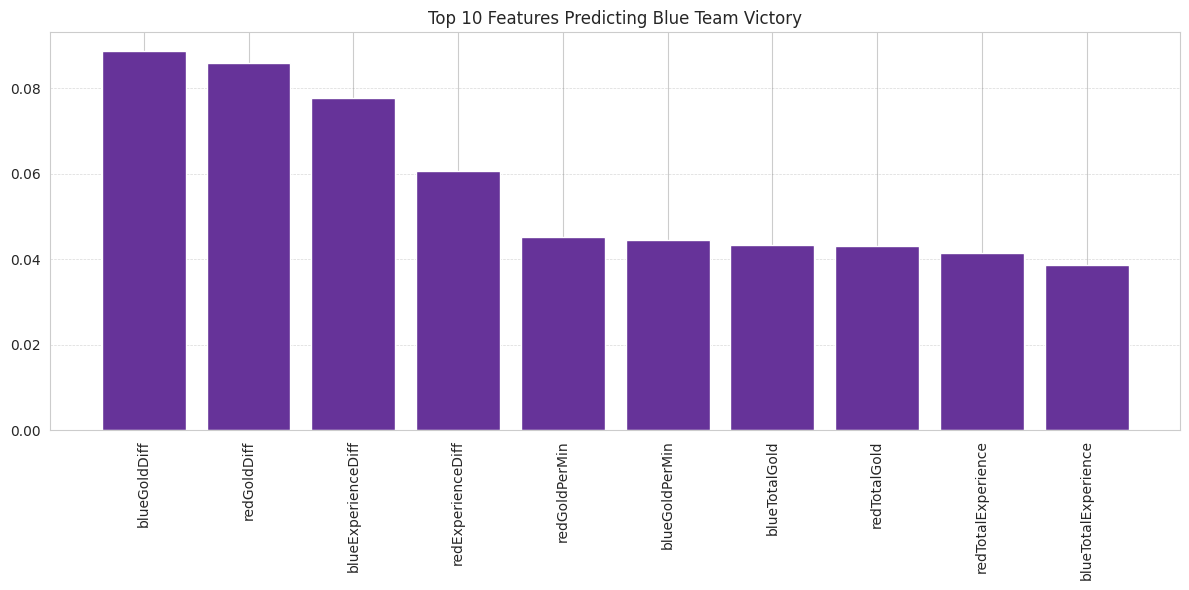

In [124]:
   # MODEL 1 - Predictors of Winning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

        # Splitting & scaling databse
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


      # Creating, training, and evaluating  the model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

      # Visualizing
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

top_n = 10
top_indices = indices[:top_n]


plt.figure(figsize=(12, 6))
plt.title("Top 10 Features Predicting Blue Team Victory")
plt.bar(range(top_n), importances[top_indices], align="center", color='rebeccapurple')
plt.xticks(range(top_n), feature_names[top_indices], rotation=90)
plt.grid(True, which='both', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

Saving high_diamond_ranked_10min.csv to high_diamond_ranked_10min (18).csv
True
Final columns: ['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueCSPerMin', 'blueGoldPerMin']
blueWins
0    4949
1    4930
Name: count, dtype: int64
Accuracy: 0.7110323886639676
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       983
           1       0.72      0.70      0.71       993

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976



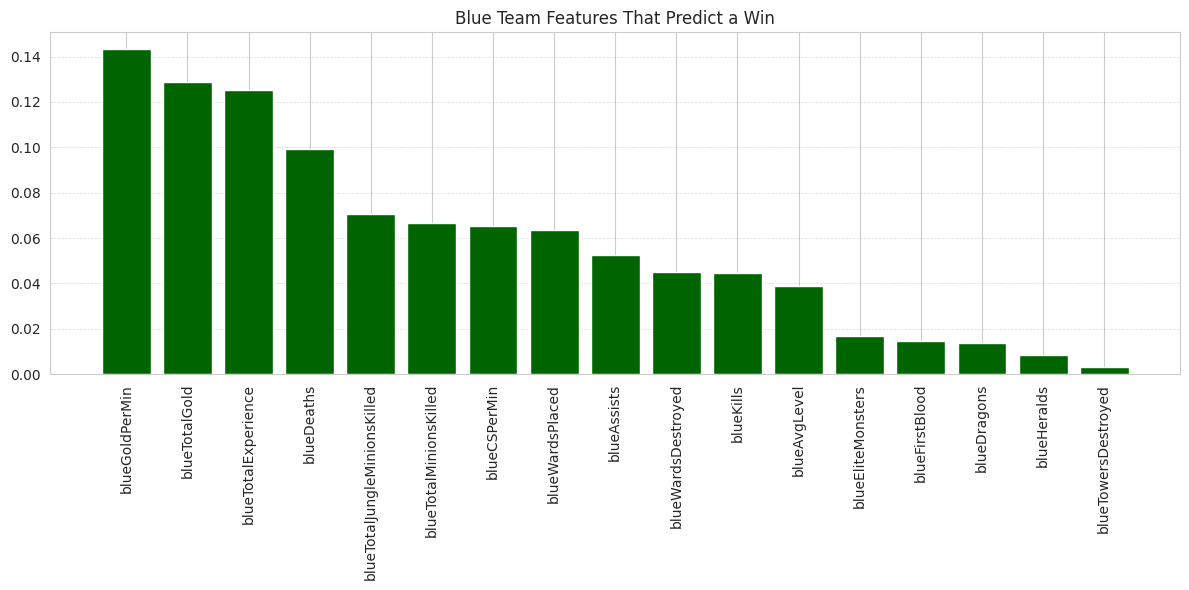

In [117]:
    # MODEL 2 - only blue features, is it a matter of blue team performance?

from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('high_diamond_ranked_10min.csv')

print('blueWins' in df.columns)
df = df.dropna()
df = df.drop(columns=['blueGoldDiff', 'blueExperienceDiff'])
df = df.reset_index(drop=True)

blue_columns = [col for col in df.columns if col.startswith('blue') or col == 'blueWins']
df_blue_only = df.loc[:, blue_columns]

print("Final columns:", df_blue_only.columns.tolist())
print(df_blue_only['blueWins'].value_counts())

          # Features (X): everything except 'blueWins'
X = df_blue_only.drop(columns=['blueWins'])
y = df_blue_only['blueWins']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

          # Train, predict and evaluate
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

          #Visualization
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Blue Team Features That Predict a Win")
plt.bar(range(X.shape[1]), importances[indices], align="center", color="darkgreen")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.grid(True, which='both', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

Accuracy using only blueKills: 63.97%
              precision    recall  f1-score   support

           0       0.62      0.72      0.67       983
           1       0.67      0.56      0.61       993

    accuracy                           0.64      1976
   macro avg       0.64      0.64      0.64      1976
weighted avg       0.64      0.64      0.64      1976



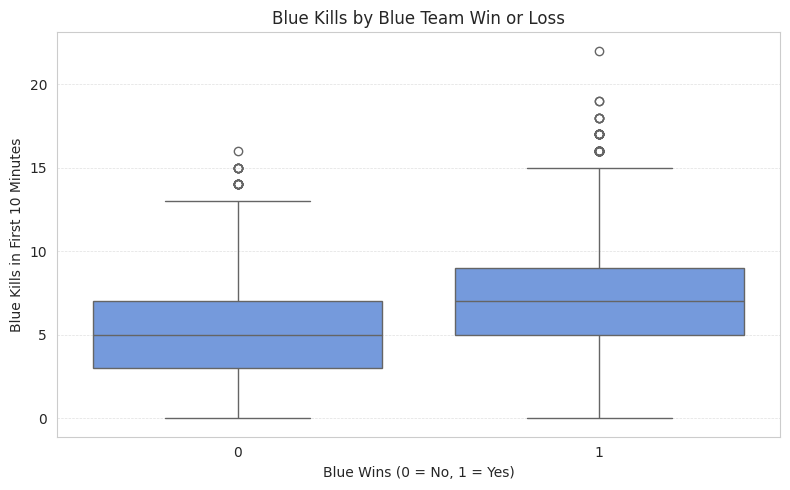

In [114]:
    # Model for correlation table in paper - Trying a model that only accounts for BlueKills

X_kills = df[['blueKills']]
y = df['blueWins']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_kills, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy using only blueKills: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


      # Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.boxplot(x=y, y=df['blueKills'], color='cornflowerblue')
plt.xlabel('Blue Wins (0 = No, 1 = Yes)')
plt.ylabel('Blue Kills in First 10 Minutes')
plt.title('Blue Kills by Blue Team Win or Loss')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)  # additional grid customization (optional)

plt.tight_layout()
plt.show()

Accuracy: 0.72165991902834
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       983
           1       0.73      0.71      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



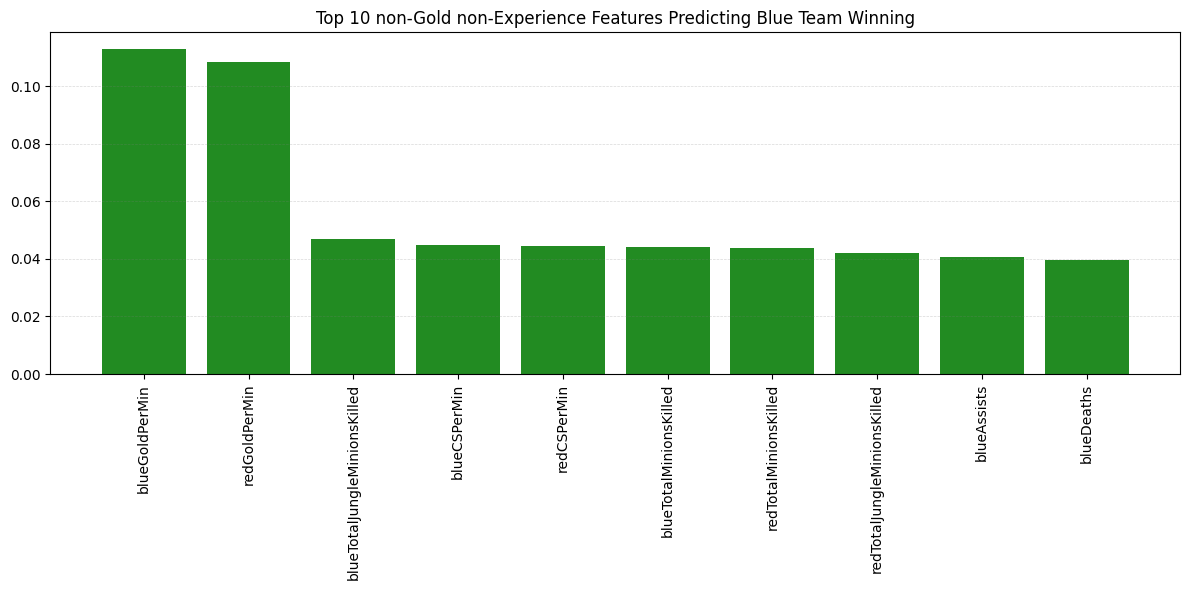

In [89]:
    # MODEL -  Predictors of Winning unnacounting for Total Gold, and Gold or Experience Diff

df = pd.read_csv('high_diamond_ranked_10min.csv')

df = df.dropna()
df = df.drop(columns=['gameId', 'redTotalGold', 'blueTotalGold','blueTotalExperience', 'redTotalExperience', 'blueGoldDiff', 'redGoldDiff', 'blueExperienceDiff', 'redExperienceDiff'])

X = df.drop('blueWins', axis=1)
y = df['blueWins']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

  # Visualization

import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

        # Selecting only the top 10 features
top_n = 10
top_indices = indices[:top_n]


plt.figure(figsize=(12, 6))
plt.title("Top 10 non-Gold non-Experience Features Predicting Blue Team Winning")
plt.bar(range(top_n), importances[top_indices], align="center", color='forestgreen')
plt.xticks(range(top_n), feature_names[top_indices], rotation=90)
plt.grid(True, which='both', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

In [111]:
# Looking at the correlations of Blue Winning scenarios

correlations = df.corr()['blueWins'].sort_values(ascending=False)
print(correlations)

blueWins                        1.000000
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
gameId                          0.000985
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroyed             -0.103696
redTotalJungleMinionsKilled    -0.110994
redFirstBlood   